# Example - Calculating Spiciness

This notebook demonstrates how to calculate sea water spiciness based on the methodology of Flament 2002. <a href="https://doi.org/10.1016/S0079-6611(02)00065-4">https://doi.org/10.1016/S0079-6611(02)00065-4</a>

In [1]:
import momlevel as ml
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

In [2]:
# Generate a sample data arrays of potential temp. and salinity

s = np.arange(33.0, 37.1, 0.1)
t = np.arange(0.0, 31.0, 1.0)

s = xr.DataArray(s, dims=("s"), coords={"s": s})
t = xr.DataArray(t, dims=("t"), coords={"t": t})

thetao, so = xr.broadcast(t, s)

In [3]:
# Calulate spiciness
spice = ml.derived.calc_spice(thetao, so)

# Calulate potential density
pdens = ml.derived.calc_pdens(thetao, so)

In [4]:
# Demonstrate the result is in xarray format
print(spice)

<xarray.DataArray (t: 31, s: 42)>
array([[-1.567664  , -1.48845186, -1.40933382, ...,  1.44084563,
         1.514272  ,  1.58736437],
       [-1.51397932, -1.43451349, -1.35514104, ...,  1.50190384,
         1.57548547,  1.6487399 ],
       [-1.4466244 , -1.36692568, -1.28732083, ...,  1.575585  ,
         1.64936642,  1.72283838],
       ...,
       [ 4.18168329,  4.25815458,  4.33459014, ...,  7.13798152,
         7.21321065,  7.28842458],
       [ 4.51968243,  4.59585345,  4.67199259, ...,  7.47057562,
         7.54582065,  7.62105108],
       [ 4.86641956,  4.94222154,  5.01799215, ...,  7.81109879,
         7.88637604,  7.96163283]])
Coordinates:
  * t        (t) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 26.0 27.0 28.0 29.0 30.0
  * s        (s) float64 33.0 33.1 33.2 33.3 33.4 ... 36.7 36.8 36.9 37.0 37.1
Attributes:
    long_name:  Sea water spiciness
    comment:    calculated based on Flament 2002 methodology
    units:      1


### Plot T, S, Spiciness, and Potential Density

This code replicates Figure 2 from Flament 2002.

Text(0.5, 1.0, 'Sea Water Spiciness (solid) and \nPotential Density (dashed)')

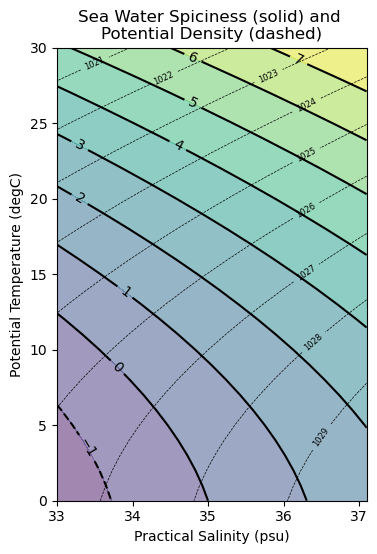

In [5]:
fig = plt.figure(figsize=(4, 6), dpi=100)
ax = plt.subplot(1, 1, 1, aspect=0.2)

levels = np.arange(-2, 9)
cb = ax.contourf(spice.s, spice.t, spice, levels=levels, alpha=0.5)
cs = ax.contour(spice.s, spice.t, spice, levels=levels, colors=["k"])
ax.clabel(cs)

levels = np.arange(1021, 1030)
cs = ax.contour(
    pdens.s,
    pdens.t,
    pdens,
    levels=levels,
    colors=["k"],
    linewidths=0.5,
    linestyles="dashed",
)
ax.clabel(cs, fontsize=6)

ax.set_ylabel("Potential Temperature (degC)")
ax.set_xlabel("Practical Salinity (psu)")

ax.set_title("Sea Water Spiciness (solid) and \nPotential Density (dashed)")